In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
# Setup

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (12,9)
plt.rcParams['font.size'] = 20
warnings.filterwarnings('ignore')

## Introduction

The transmission line is the most crucial part of the power system. The requirement of power and its allegiance has grown up exponentially over the modern era, and the prominent role of a transmission line is to transmit electric power from the source area to the distribution network. The electrical power system consists of so many complex dynamic and interacting elements that are always prone to disturbance or an electrical fault.

## Data and Overview

### Binary and Multiclass Classification

Our dataset contains the possibility for both types of classification. Firstly we predict whether the electrical relays have a fault or not. Futhermore, we predict where the fault is. Based on where the fault is found, there are different permutations. <br>
Output: [G C B A] <br>
[0 0 0 0] - No Fault <br>
[1 0 0 1] - LG fault (Between Phase A and Ground) <br>
[0 0 1 1] - LL fault (Between Phase A and Phase B) <br>
[1 0 1 1] - LLG Fault (Between Phases A,B and Ground) <br>
[0 1 1 1] - LLL Fault (Between all three phases) <br>
[1 1 1 1] - LLLG fault (Three phase symmetrical fault) <br>
Here, we conclude that there are 6 types of faults, hence 6 output classes.


In [3]:
binary_data = pd.read_csv('classData1.csv')
multi_data = pd.read_csv('classData1.csv')

In [46]:
#Info about binary and multidata
binary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Vc      7861 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 491.4 KB


## Exploratory Data Analysis - Binary Classification

Columns 7 and 8 contain no information, so we drop them

In [6]:
binary_data.drop(binary_data.iloc[:,[7,8]], axis=1, inplace=True)

In [7]:
print(f'Number of Samples: {binary_data.shape[0]}\nNumber of Features: {binary_data.shape[1]}')

Number of Samples: 7861
Number of Features: 8


<h4>Composition of Target variable<h4>

## Feature engineering

In [49]:
binary_data.isna().sum()

G     0
C     0
B     0
A     0
Ia    0
Ib    0
Ic    0
Vc    0
dtype: int64

Since there are no missing values, all values are standardised and there are no categorical varibales, no further feature engineering is required

## Binary Classification Neural Network Model

In [57]:
binary_data.head()

,G,C,B,A,Ia,Ib,Ic,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,-0.113983


In [13]:
y = binary_data.iloc[:,0]
X = binary_data.iloc[:,1:7]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6288, 6), (1573, 6), (6288,), (1573,))

In [61]:
X_test

,Ia,Ib,Ic,Va,Vb,Vc
834,-877.131763,-54.269164,0.246562,0.074140,0.186499,-0.260640
2698,56.037710,-288.512410,235.148317,0.380893,0.040376,-0.421270
5994,43.877065,-20.668865,-26.638721,0.418970,0.171234,-0.590203
7362,-37.617238,94.971179,-60.362054,-0.596506,0.170116,0.426389
6744,4.334075,-26.685624,19.159367,0.592397,-0.289285,-0.303112
...,...,...,...,...,...,...
3152,41.915404,-732.270274,692.800473,0.005202,0.017075,-0.022277
1414,633.537970,195.156434,48.356566,0.040102,-0.375257,0.335155
2939,-62.011921,673.188423,-608.743113,-0.114381,-0.024551,0.138932
7341,-17.869694,90.846768,-75.991264,-0.617593,0.352027,0.265566


In [14]:
tf.random.set_seed(2)

model1 = keras.models.Sequential()

model1.add(keras.layers.Dense(6,  
                              input_shape=(6,),
                              name='Input_layer',
                              activation='relu'))
model1.add(keras.layers.Dense(16,
                             name='Hidden_layer1',
                             activation='relu'))
model1.add(keras.layers.Dense(1,
                             name='Output_layer',
                             activation='sigmoid'))

model1.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

In [15]:
history = model1.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
158/158 [==============================] - 3s 8ms/step - loss: 1.4350 - accuracy: 0.7809 - val_loss: 0.3864 - val_accuracy: 0.8188
Epoch 2/5
158/158 [==============================] - 1s 4ms/step - loss: 0.3894 - accuracy: 0.8326 - val_loss: 0.3560 - val_accuracy: 0.8529
Epoch 3/5
158/158 [==============================] - 1s 4ms/step - loss: 0.3478 - accuracy: 0.8362 - val_loss: 0.2656 - val_accuracy: 0.8816
Epoch 4/5
158/158 [==============================] - 1s 4ms/step - loss: 0.3011 - accuracy: 0.8525 - val_loss: 0.2995 - val_accuracy: 0.8585
Epoch 5/5
158/158 [==============================] - 1s 4ms/step - loss: 0.2986 - accuracy: 0.8584 - val_loss: 0.2647 - val_accuracy: 0.8712


In [16]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 6)                 42        
                                                                 
 Hidden_layer1 (Dense)       (None, 16)                112       
                                                                 
 Output_layer (Dense)        (None, 1)                 17        
                                                                 
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = pd.DataFrame(history.history)

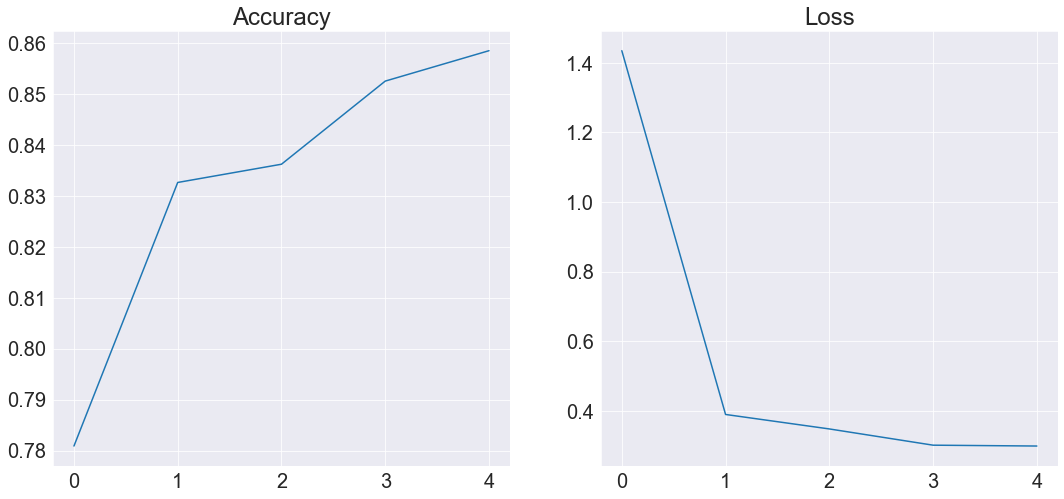

In [18]:
plt.figure(figsize=(18,8))

a1 = plt.subplot2grid((1,2),(0,0))
a1.plot(history['accuracy'], label='Accuracy')
a1.set_title('Accuracy')

a2 = plt.subplot2grid((1,2),(0,1))
a2.plot(history['loss'], label='Loss')
a2.set_title('Loss')

plt.show()

In [19]:
y_pred = model1.predict(X_test)
y_pred.shape, y_test.shape

50/50 [==============================] - 0s 2ms/step


((1573, 1), (1573,))

In [21]:
y_pred = np.where(y_pred>0.5, 1, 0)

In [22]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)*100:.03f}%')
print(f'Precision Score: {precision_score(y_test, y_pred)*100:.03f}%')
print(f'Recall Score: {recall_score(y_test, y_pred)*100:.03f}%')

Accuracy Score: 84.488%
Precision Score: 85.906%
Recall Score: 76.190%


In [23]:
confusion_matrix(y_test, y_pred)

array([[817,  84],
       [160, 512]], dtype=int64)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       901
           1       0.86      0.76      0.81       672

    accuracy                           0.84      1573
   macro avg       0.85      0.83      0.84      1573
weighted avg       0.85      0.84      0.84      1573



## Exploratory Data Analysis - Multiclass Classification

In [25]:
print(f'Number of Samples: {multi_data.shape[0]}\nNumber of Features: {multi_data.shape[1]}')

Number of Samples: 7861
Number of Features: 10


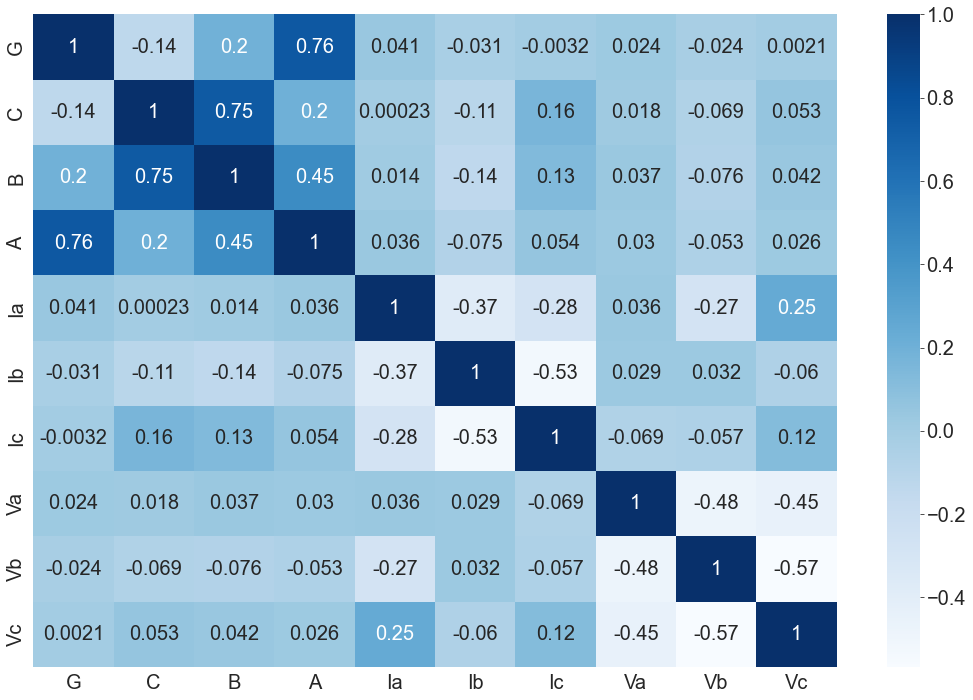

In [26]:
plt.figure(figsize=(18,12))
sns.heatmap(multi_data.corr(), annot=True, cmap='Blues')
plt.show()

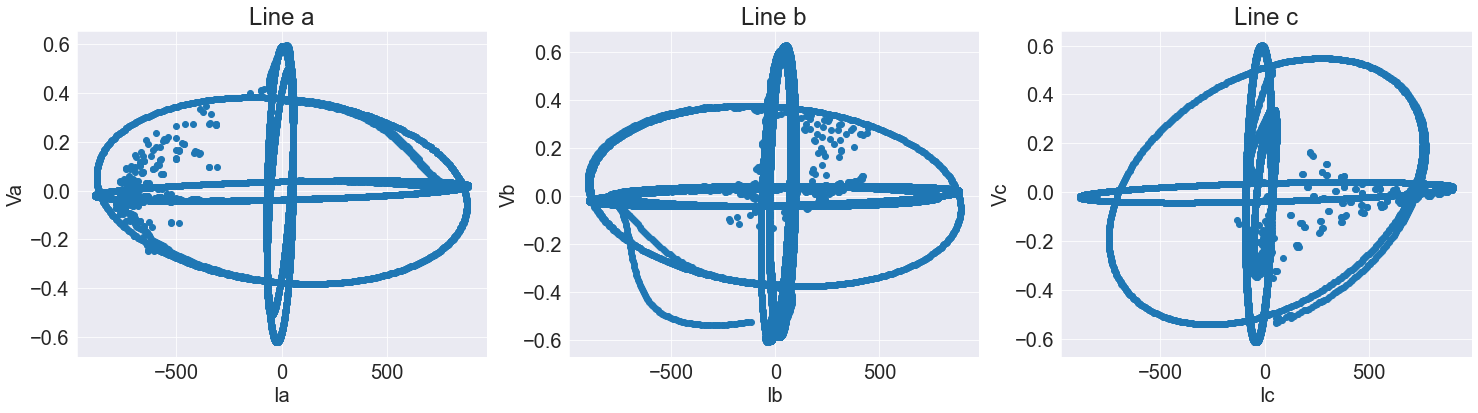

In [27]:
plt.figure(figsize=(25,6))

a1 = plt.subplot2grid((1,3),(0,0))
a1.scatter(multi_data['Ia'], multi_data['Va'])
a1.set_title('Line a')
a1.set_xlabel('Ia')
a1.set_ylabel('Va')

a2 = plt.subplot2grid((1,3),(0,1))
a2.scatter(multi_data['Ib'], multi_data['Vb'])
a2.set_title('Line b')
a2.set_xlabel('Ib')
a2.set_ylabel('Vb')

a3 = plt.subplot2grid((1,3),(0,2))
a3.scatter(multi_data['Ic'], multi_data['Vc'])
a3.set_title('Line c')
a3.set_xlabel('Ic')
a3.set_ylabel('Vc')

plt.show()

## Feature engineering

In [28]:
multi_data.isna().sum()

G     0
C     0
B     0
A     0
Ia    0
Ib    0
Ic    0
Va    0
Vb    0
Vc    0
dtype: int64

Since there are no missing values, all values are standardised and there are no categorical varibales, no further feature engineering is required

## Multiclass Classification Neural Network Model

Output: [G C B A] <br>
[0 0 0 0] - No Fault <br>
[1 0 0 1] - LG fault (Between Phase A and Ground) <br>
[0 0 1 1] - LL fault (Between Phase A and Phase B) <br>
[1 0 1 1] - LLG Fault (Between Phases A,B and Ground) <br>
[0 1 1 1] - LLL Fault (Between all three phases) <br>
[1 1 1 1] - LLLG fault (Three phase symmetrical fault) <br>

Since output is of four different types, we put them together in one column and there permutations become different output classes

In [29]:
multi_data['faultType'] = multi_data['G'].astype(str) + multi_data['C'].astype(str) + multi_data['B'].astype(str) + multi_data['A'].astype(str)
multi_data.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,faultType
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001


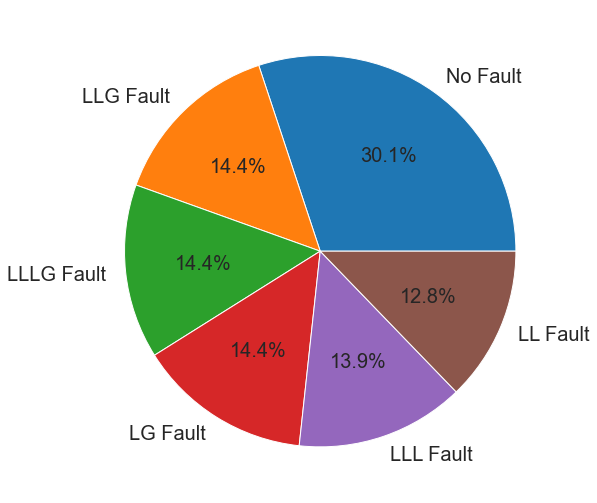

In [30]:
plt.pie(multi_data['faultType'].value_counts(), autopct='%1.1f%%',
       labels=['No Fault', 'LLG Fault', 'LLLG Fault', 'LG Fault', 'LLL Fault', 'LL Fault'])
plt.show()

In [31]:
X = multi_data.drop(['G','C','B','A','faultType'], axis=1)
y = multi_data['faultType']

In [32]:
enc = LabelEncoder()
y = enc.fit_transform(y)

In [33]:
y = keras.utils.to_categorical(y, 6)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6288, 6), (1573, 6), (6288, 6), (1573, 6))

In [35]:
tf.random.set_seed(2)

model2 = keras.models.Sequential()

model2.add(keras.layers.Dense(128,
                              input_shape=(6,),
                              name='Input_layer',
                              activation='relu'))
model2.add(keras.layers.Dense(240,
                              name='Hidden_layer1',
                              activation='relu'))
model2.add(keras.layers.Dense(240,
                              name='Hidden_layer2',
                              activation='tanh'))
model2.add(keras.layers.Dense(240,
                              name='Hidden_layer3',
                              activation='relu'))

model2.add(keras.layers.Dense(6,
                             name='output_layer',
                             activation='softmax'))

model2.compile(
    loss='categorical_crossentropy',
    metrics = ['accuracy']
)

In [36]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 128)               896       
                                                                 
 Hidden_layer1 (Dense)       (None, 240)               30960     
                                                                 
 Hidden_layer2 (Dense)       (None, 240)               57840     
                                                                 
 Hidden_layer3 (Dense)       (None, 240)               57840     
                                                                 
 output_layer (Dense)        (None, 6)                 1446      
                                                                 
Total params: 148,982
Trainable params: 148,982
Non-trainable params: 0
_________________________________________________________________


In [37]:
history = model2.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
79/79 [==============================] - 3s 15ms/step - loss: 1.1362 - accuracy: 0.5692 - val_loss: 1.0244 - val_accuracy: 0.6701
Epoch 2/50
79/79 [==============================] - 1s 8ms/step - loss: 0.9980 - accuracy: 0.6087 - val_loss: 1.0545 - val_accuracy: 0.5159
Epoch 3/50
79/79 [==============================] - 1s 9ms/step - loss: 0.9343 - accuracy: 0.6346 - val_loss: 0.8448 - val_accuracy: 0.6765
Epoch 4/50
79/79 [==============================] - 1s 9ms/step - loss: 0.8976 - accuracy: 0.6417 - val_loss: 0.8803 - val_accuracy: 0.6550
Epoch 5/50
79/79 [==============================] - 1s 9ms/step - loss: 0.8448 - accuracy: 0.6640 - val_loss: 1.0034 - val_accuracy: 0.5930
Epoch 6/50
79/79 [==============================] - 1s 9ms/step - loss: 0.8058 - accuracy: 0.6700 - val_loss: 0.9061 - val_accuracy: 0.6550
Epoch 7/50
79/79 [==============================] - 1s 9ms/step - loss: 0.7524 - accuracy: 0.6917 - val_loss: 0.6919 - val_accuracy: 0.7178
Epoch 8/50
79/79 [=

In [38]:
history = pd.DataFrame(history.history)

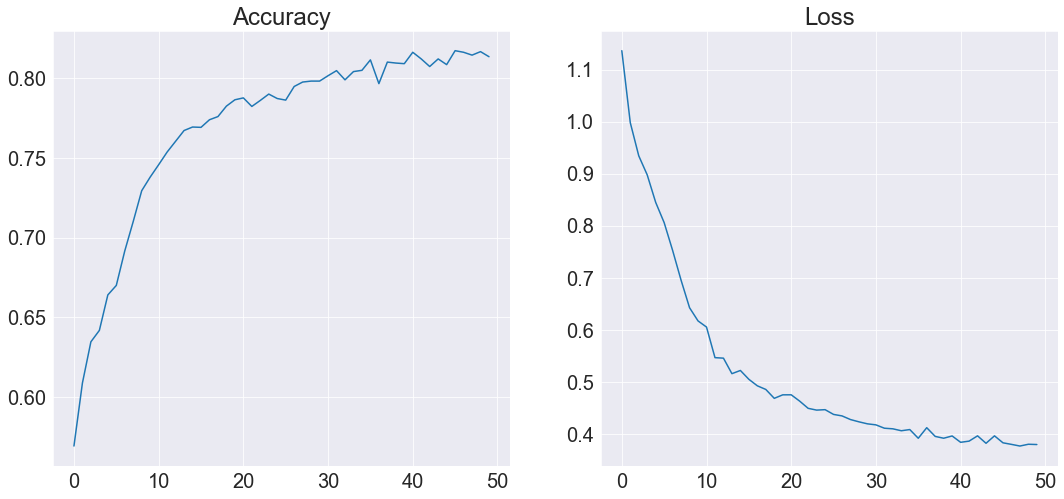

In [39]:
plt.figure(figsize=(18,8))

a1 = plt.subplot2grid((1,2),(0,0))
a1.plot(history['accuracy'], label='Accuracy')
a1.set_title('Accuracy')

a2 = plt.subplot2grid((1,2),(0,1))
a2.plot(history['loss'], label='Loss')
a2.set_title('Loss')

plt.show()

In [40]:
y_pred_prob = model2.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test = np.argmax(y_test, axis=1)

50/50 [==============================] - 0s 3ms/step


In [41]:
y_test.shape, y_pred.shape

((1573,), (1573,))

In [42]:
print(f'Accuracy Score : {accuracy_score(y_test, y_pred)*100:.03f}%')

Accuracy Score : 81.055%


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       468
           1       0.80      0.99      0.88       202
           2       0.50      0.67      0.57       231
           3       0.92      1.00      0.96       220
           4       0.83      0.88      0.86       226
           5       0.53      0.15      0.24       226

    accuracy                           0.81      1573
   macro avg       0.76      0.78      0.75      1573
weighted avg       0.80      0.81      0.79      1573

